#### Sobre o conjunto de dados

Esse banco de dados também está disponível por meio do servidor UW CS ftp:
ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

Também pode ser encontrado no UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Informações do atributo:

1) ID número
2) Diagnóstico (M = maligno, B = benigno)
3-32)

Dez características de valor real são computadas para cada núcleo celular:

a) raio (média das distâncias do centro aos pontos no perímetro)


b) textura (desvio padrão dos valores da escala de cinza)

c) perímetro

d) área

e) suavidade (variação local nos comprimentos do raio)

f) compacidade (perímetro^2 / área - 1,0)

g) concavidade (severidade das porções côncavas do contorno)

h) pontos côncavos (número de porções côncavas do contorno)

i) simetria

j) dimensão fractal ("aproximação da linha costeira" - 1)

A média, o erro padrão e o "pior" ou maior (média dos três
maiores valores) dessas feições foram computados para cada imagem,
resultando em 30 feições. Por exemplo, o campo 3 é o raio médio, o campo
13 é o raio SE, o campo 23 é o pior raio.

Todos os valores de recursos são recodificados com quatro dígitos significativos.

Valores de atributos ausentes: nenhum

Distribuição de classes: 357 benignas, 212 malignas

In [ ]:
import numpy as np  #utilizada para tratar vetores e matrizes

import pandas as pd  #utilizada para tratar dataframes

import matplotlib as mpl  #utilizada para tratar gráficos
import matplotlib.pyplot as plt

from sklearn import preprocessing  #utilizada para realizar o preprocessamento dos dados
from sklearn.model_selection import train_test_split # função utilizada para dividir do dataset entre treinamento e test
from sklearn.metrics import classification_report, confusion_matrix  #metrica de desempenho para o sklearn



In [ ]:
# Realiza o download do dataset a ser utilizado.
!wget -q https://raw.githubusercontent.com/patrickmlong/Breast-Cancer-Wisconsin-Diagnostic-DataSet/master/data.csv
data = pd.read_csv("data.csv")

In [ ]:
data.head(5) #apresenta uma amostra do banco de dados

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# **Conhecendo os Dados**

In [ ]:
#conhecendo o banco de dados
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
#Conhecendo o banco de dados
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
data.columns  #verificando os nomes das colunas do dataframe

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [ ]:
data_new=data[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean']] #selecionando algumas colunas do dataframe

In [ ]:
data_new.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)  #verifica a correlação entre os dados


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean
radius_mean,1.0,0.32,1.0,0.99,0.17,0.51,0.68
texture_mean,0.32,1.0,0.33,0.32,-0.023,0.24,0.3
perimeter_mean,1.0,0.33,1.0,0.99,0.21,0.56,0.72
area_mean,0.99,0.32,0.99,1.0,0.18,0.5,0.69
smoothness_mean,0.17,-0.023,0.21,0.18,1.0,0.66,0.52
compactness_mean,0.51,0.24,0.56,0.5,0.66,1.0,0.88
concavity_mean,0.68,0.3,0.72,0.69,0.52,0.88,1.0


<AxesSubplot:xlabel='radius_mean', ylabel='perimeter_mean'>

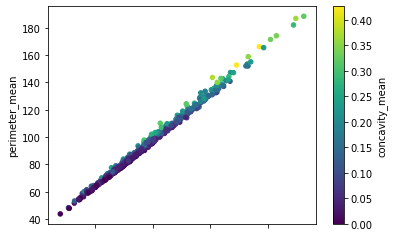

In [ ]:
data_new.plot.scatter(x='radius_mean',y='perimeter_mean',c='concavity_mean',colormap='viridis')    #realiza o plot dos gráficos de dispersão

# **Limpando e Pre-processando os Dados**

In [ ]:
data = data.drop('id',axis=1)   #retira o id
data = data.drop('Unnamed: 32',axis=1) #retira a coluna Unnamed

In [ ]:
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0}) # transformando os dados da coluna de diagnóstico (M - 1) e (B - 0)

In [ ]:
data_n2 = pd.DataFrame(preprocessing.scale(data.iloc[:,1:32]))  # pega as colunas do dataframe (1 a 32) e realiza a normalização dos dados
data_n2.columns = list(data.iloc[:,1:32].columns)  #coloca o cabaçalho no "novo" dataframe
data_n2['diagnosis'] = data['diagnosis'] #coloca os valores para a saída (diagnóstico) no "novo" dataframe

In [ ]:
data_n2.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,1
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,1
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,1
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,1
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,1


In [ ]:
data_out = data_n2.drop('diagnosis',axis=1)  # seleciona os valores para serem utilizados como entrada do dataframe
X = data_out.values  # cria o vetor de entrada

In [ ]:
X

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

# **Criando o Modelo de Deep Learning**

In [ ]:
from keras.models import Sequential, Model  #utilizada para criar o modelo sequencial da MLP
from keras.layers import Dense, Dropout, Input #utilizada para criar as camadas da rede
from keras.optimizers import SGD #otimizador utilizado

In [ ]:
model = Sequential() #cria o objeto para o modelo sequencial
model.add(Dense(128,activation="relu",input_dim = np.shape(X)[1]))  # cria a camada inicial para os dados (deve conter a dimensão dos dados de entrada)
model.add(Dropout(0.25))  # adiciona a cada de dropout com 0.25% de neuronios "dropados"
model.add(Dense(32, activation='relu')) #adiciona a nova camada escodida
model.add(Dropout(0.25)) #adiciona o dropout
model.add(Dense(32, activation='relu')) #adiciona outra camada escondida
model.add(Dense(1, activation='sigmoid')) #adiciona a cadama de saída


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3968      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 9,185
Trainable params: 9,185
Non-trainabl

In [ ]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)  #indica qual será o otimizador utilizado


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy']) #indica qual será a função perda a ser utilizada

# **Realiza a Partição dos Dados**

In [ ]:
#divide o conjunto de dados entre treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, data_n2['diagnosis'], test_size=0.3, random_state=0)

In [ ]:
y_test

512    1
457    0
439    0
298    0
37     0
      ..
7      1
408    1
523    0
361    0
553    0
Name: diagnosis, Length: 171, dtype: int64

# Realiza o Treinamento do **Modelo**

In [ ]:
#Treinamento do modelo
model.fit(X_train, y_train, epochs=150, batch_size=10) # X= entrada do modelo/ Y=target(saida do modelo) /epochs= número de iterações sobre o dataset
# batch_size= número de instancias do dataset que deve ser utilizado, por vez, para treinar o modelo

Epoch 1/150
40/40 [==============================] - 1s 2ms/step - loss: 0.3575 - accuracy: 0.8794
Epoch 2/150
40/40 [==============================] - 0s 2ms/step - loss: 0.1198 - accuracy: 0.9724
Epoch 3/150
40/40 [==============================] - 0s 2ms/step - loss: 0.0756 - accuracy: 0.9824
Epoch 4/150
40/40 [==============================] - 0s 2ms/step - loss: 0.0696 - accuracy: 0.9799
Epoch 5/150
40/40 [==============================] - 0s 3ms/step - loss: 0.0717 - accuracy: 0.9749
Epoch 6/150
40/40 [==============================] - 0s 2ms/step - loss: 0.0565 - accuracy: 0.9874
Epoch 7/150
40/40 [==============================] - 0s 2ms/step - loss: 0.0609 - accuracy: 0.9799
Epoch 8/150
40/40 [==============================] - 0s 2ms/step - loss: 0.0591 - accuracy: 0.9799
Epoch 9/150
40/40 [==============================] - 0s 2ms/step - loss: 0.0446 - accuracy: 0.9874
Epoch 10/150
40/40 [==============================] - 0s 3ms/step - loss: 0.0553 - accuracy: 0.9849
Epoch 11/

# **Realiza a Análise do Modelo**

In [ ]:
#avaliar o modelo
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

6/6 [==============================] - 0s 3ms/step - loss: 0.3845 - accuracy: 0.9474

accuracy: 94.74%


In [ ]:
#realiza a previsão
previsao_MLP = model.predict(X_test)

6/6 [==============================] - 0s 2ms/step


In [ ]:
previsao_MLP[:30]

array([[1.0000000e+00],
       [5.1615411e-01],
       [1.4155338e-09],
       [3.1505556e-06],
       [7.3394535e-09],
       [2.6616429e-10],
       [1.3420111e-17],
       [2.6953106e-09],
       [1.0571808e-17],
       [1.1920062e-27],
       [8.9674038e-05],
       [2.2153007e-03],
       [1.6795710e-17],
       [9.9387705e-01],
       [5.2102816e-01],
       [1.0000000e+00],
       [9.2515788e-19],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [2.0378334e-08],
       [4.5328021e-09],
       [1.0000000e+00],
       [2.8171942e-12],
       [1.2279728e-14],
       [9.9999988e-01],
       [2.2301523e-09],
       [1.0000000e+00]], dtype=float32)

In [ ]:
y_test

512    1
457    0
439    0
298    0
37     0
      ..
7      1
408    1
523    0
361    0
553    0
Name: diagnosis, Length: 171, dtype: int64

In [ ]:
labels = (previsao_MLP > 0.5).astype(np.int)
labels

<ipython-input-29-a49cdde33519>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  labels = (previsao_MLP > 0.5).astype(np.int)


array([[1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
    

<AxesSubplot:>

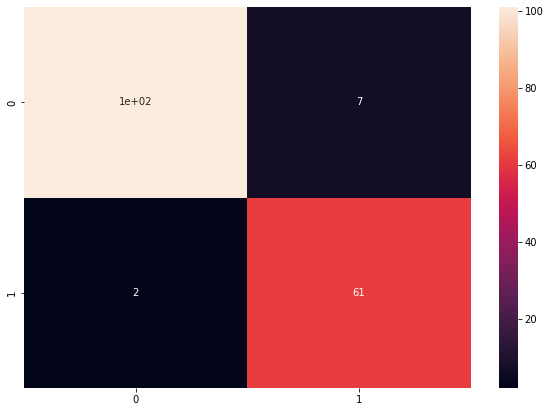

In [ ]:
#matrix de confusão
matriz_confusao_mlp = confusion_matrix(y_test, labels) #constroi a matriz de confusao (numérica)

import seaborn
plt.figure(figsize = (10,7))
seaborn.heatmap(matriz_confusao_mlp, annot=True)
